In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import fmin
from scipy import integrate
import scipy.stats as st

In [4]:
def get_new_z(old_z, theta, phi):
    return old_z * math.cos(theta) - math.sin(theta) * math.cos(phi) * math.sqrt(1 -  old_z ** 2)

In [5]:
d = 1
l = 1
theta = st.truncnorm(0, 2 * math.pi, 0, 1).rvs(1)
phi = np.random.uniform(0, 2 * math.pi, 1)
get_new_z(1, theta, phi)

0.5075599359010249

In [6]:
def lostnrg(E_start, d):
    z = 1
    E = E_start
    D = d
    l = 1
    
    while True:
        R = np.random.exponential(1 / l) # Длина свободного пробега
        
        # Рассчет углов
        theta = st.truncnorm(0, 2 * math.pi, 0, 1).rvs(1)
        phi = np.random.uniform(0, 2 * math.pi, 1)
       
        z = get_new_z(z, theta, phi)
        
        Rz = z * R # Длина проекции пробега на z
        D = D - Rz # Сколько осталось пройти
        
        # Если путь пройден
        if D <= 0:
            break
        
        # Прото вернулся назад
        if D >= d:
            return E0
        
        # Энергии потеряно при столкновении
        e = np.random.uniform(0, E_start)
        
        # Энергия кончилась
        if E <= e:
            return E_start
        
        # Произошла потеря энергии
        E = E - e
        
    return E_start - E

In [7]:
#начальная энергия
E0 = 1
d = 1

In [8]:
experiments = []

count = 0
while count <= 1000:
    ex = lostnrg(E0, d)
    
    if ex != E0:
        experiments.append(ex)
        count = count + 1

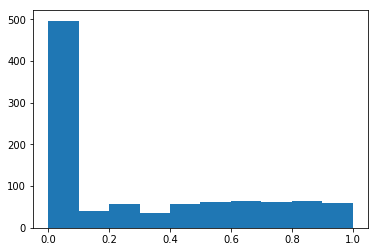

In [9]:
_ = plt.hist(experiments)

In [154]:
np.mean(experiments)

0.2933096970164513